# Source

https://www.learnpytorch.io/

# Libraires

In [1405]:
# !pip install plotly -U --quiet
# !pip install torchmetrics -U --quiet

In [1406]:
import  torch
import  matplotlib.pyplot as plt
import  numpy as np
import  pandas as pd
import  plotly.express as px
import  plotly.graph_objects as go

from    google.colab import drive
from    sklearn.model_selection import train_test_split
from    sklearn.preprocessing import StandardScaler
from    imblearn.over_sampling import SMOTE
from    imblearn.combine import SMOTEENN
from    torch import nn
from    torch import optim
from    torchmetrics import (Accuracy,
                             Precision,
                             Recall,
                             F1Score)

In [1407]:
num_seed = 31
seed = np.random.seed(num_seed)

torch.manual_seed(num_seed)

In [1408]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Dataset

In [1409]:
df_wine = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/winequality-red.csv',
                      sep=',',
                      encoding='utf-8')

df_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [1410]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [1411]:
features = df_wine.drop('quality', axis=1).columns.to_list()

features

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [1412]:
target = df_wine.columns.to_list()[-1]

target

'quality'

In [1413]:
df_wine[target].unique()

array([5, 6, 7, 4, 8, 3])

In [1414]:
df_wine[target].replace([3, 4, 5, 6, 7, 8], [0, 1, 2, 3, 4, 5],
                        inplace=True)

In [1415]:
df_wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,2
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,2
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,4
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,4
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,2


# Data visualization

In [1416]:
fig = px.histogram(df_wine, x='quality')
fig.show()

It's a good practice resampling the data to have a equal balance

In [1417]:
df_wine['quality'].value_counts()

2    681
3    638
4    199
1     53
5     18
0     10
Name: quality, dtype: int64

In [1418]:
maior_quantidade_qualidade = df_wine['quality'].value_counts().max()

maior_quantidade_qualidade

681

# Resampling data

In [1419]:
X = df_wine.drop(columns='quality')

y = df_wine['quality']

In [1420]:
smoteenn = SMOTEENN()

X_smoteenn, y_smoteenn = smoteenn.fit_resample(X, y)

In [1421]:
smote = SMOTE()

X_smote, y_smote = smote.fit_resample(X, y)

In [1422]:
print('Shape of X_smoteenn: ', X_smoteenn.shape)
print('Shape of y_smoteenn: ', y_smoteenn.shape)

print('Shape of X_smote: ', X_smote.shape)
print('Shape of y_smote: ', y_smote.shape)

Shape of X_smoteenn:  (2402, 11)
Shape of y_smoteenn:  (2402,)
Shape of X_smote:  (4086, 11)
Shape of y_smote:  (4086,)


In [1423]:
df_wine_smoteenn = pd.DataFrame(np.column_stack((X_smoteenn, y_smoteenn)))

df_wine_smoteenn.rename(columns={0:  df_wine.columns[0],
                                 1:  df_wine.columns[1],
                                 2:  df_wine.columns[2],
                                 3:  df_wine.columns[3],
                                 4:  df_wine.columns[4],
                                 5:  df_wine.columns[5],
                                 6:  df_wine.columns[6],
                                 7:  df_wine.columns[7],
                                 8:  df_wine.columns[8],
                                 9:  df_wine.columns[9],
                                 10: df_wine.columns[10],
                                 11: df_wine.columns[11]},
                        inplace=True)

df_wine_smoteenn.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.00080,3.25,0.57,9.0,0.0
1,10.4,0.610,0.49,2.10,0.200,5.0,16.0,0.99940,3.16,0.63,8.4,0.0
2,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.7,0.0
3,10.4,0.440,0.42,1.50,0.145,34.0,48.0,0.99832,3.38,0.86,9.9,0.0
4,8.3,1.020,0.02,3.40,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,0.0


In [1424]:
fig = px.histogram(df_wine_smoteenn, x='quality')

fig.show()

In [1425]:
df_wine_smote = pd.DataFrame(np.column_stack((X_smote, y_smote)))

df_wine_smote.rename(columns={0: df_wine.columns[0],
                              1: df_wine.columns[1],
                              2: df_wine.columns[2],
                              3: df_wine.columns[3],
                              4: df_wine.columns[4],
                              5: df_wine.columns[5],
                              6: df_wine.columns[6],
                              7: df_wine.columns[7],
                              8: df_wine.columns[8],
                              9: df_wine.columns[9],
                              10: df_wine.columns[10],
                              11: df_wine.columns[11]},
                          inplace=True)

df_wine_smote.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4081,8.890342,0.316716,0.414239,1.875341,0.073383,38.547731,77.205678,0.993595,3.108227,0.676852,12.342499,5.0
4082,10.368254,0.360367,0.523780,2.434127,0.070207,5.414682,16.000000,0.996665,3.162440,0.658294,11.311012,5.0
4083,6.520926,0.501478,0.158522,2.162956,0.062716,27.147818,47.284061,0.993042,3.578771,0.740000,13.293856,5.0
4084,10.652962,0.511025,0.632540,4.382689,0.083957,6.000000,18.318908,0.997983,3.196162,0.768326,12.821071,5.0
4085,9.881093,0.377297,0.475406,2.288036,0.069220,5.389956,14.440178,0.996404,3.227991,0.665598,11.272969,5.0


In [1426]:
fig = px.histogram(df_wine_smote, x='quality')

fig.show()

# Scaling train test split

In [1427]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X_smote,
                                                            y_smote,
                                                            test_size=0.3,
                                                            random_state=seed)

X_train, X_val, y_train, y_val = train_test_split(X_train_val,
                                                  y_train_val,
                                                  test_size=0.1,
                                                  random_state=seed)

print('\nShape of X_train: ', X_train.shape)
print('Shape of y_train: ', y_train.shape)

print('\nShape of X_test: ', X_test.shape)
print('Shape of y_test: ', y_test.shape)

print('\nShape of X_val: ', X_val.shape)
print('Shape of y_val: ', y_val.shape)


Shape of X_train:  (2574, 11)
Shape of y_train:  (2574,)

Shape of X_test:  (1226, 11)
Shape of y_test:  (1226,)

Shape of X_val:  (286, 11)
Shape of y_val:  (286,)


In [1428]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

X_val_scaled = scaler.transform(X_val)

Notice that we use .fit_transform() on X_train while we use .transform() on X_val and X_test.

**We do this because we want to scale the validation and test set with the same parameters as that of the train set to avoid data leakage.** fit_transform calculates scaling values and applies them while .transform only applies the calculated values.

Source: https://towardsdatascience.com/pytorch-tabular-multiclass-classification-9f8211a123ab

In [1429]:
print('Shape of X_train_scaled: ', X_train_scaled.shape)
print('Shape of X_test_scaled: ', X_test_scaled.shape)
print('Shape of X_val_scaled: ', X_val_scaled.shape)

Shape of X_train_scaled:  (2574, 11)
Shape of X_test_scaled:  (1226, 11)
Shape of X_val_scaled:  (286, 11)


In [1430]:
# X_train_scaled, y_train_scaled = np.array(X_train_scaled), np.array(y_train)

# X_val_scaled, y_val_scaled = np.array(X_val_scaled), np.array(y_val)

# X_test_scaled, y_test_scaled = np.array(X_test_scaled), np.array(y_test)

# Multilayer perceptron

## Tensors

In [1431]:
# Check available hardware
if torch.cuda.is_available():
  device = torch.device('cuda')
else:
  device = torch.device('cpu')

print(device)

cpu


In [1432]:
X_train_tensor = torch.from_numpy(X_train_scaled).float().to(device)

y_train_tensor = torch.LongTensor(y_train.values).to(device)


X_test_tensor = torch.from_numpy(X_test_scaled).float().to(device)

y_test_tensor = torch.LongTensor(y_test.values).to(device)


X_val_tensor = torch.from_numpy(X_val_scaled).float().to(device)

y_val_tensor = torch.LongTensor(y_val.values).to(device)


print(X_train_tensor)
print(y_train_tensor)
print('-' * 30)
print(X_test_tensor)
print(y_test_tensor)
print('-' * 30)
print(X_val_tensor)
print(y_val_tensor)

tensor([[-0.2974, -0.5170, -0.3580,  ...,  0.2264,  0.3601,  0.6751],
        [-0.4678, -0.5619,  0.1793,  ..., -0.4391, -0.7813, -0.7118],
        [ 2.1572, -0.4845,  0.9192,  ..., -0.5799,  0.4971, -0.8169],
        ...,
        [-0.4795, -1.1495,  0.7165,  ...,  0.7564,  1.0361,  1.0000],
        [ 1.2047, -0.1325,  0.9458,  ..., -0.6211,  0.3043, -1.5625],
        [ 0.2423,  0.0543,  0.0788,  ...,  0.2236, -1.0911, -1.3907]])
tensor([4, 3, 1,  ..., 3, 0, 2])
------------------------------
tensor([[-0.2257,  3.4000, -0.9817,  ...,  0.8148, -1.4478, -0.1755],
        [-0.5396,  0.0543, -1.1968,  ...,  0.1570, -0.7688, -0.5369],
        [ 1.2047, -0.3954,  0.8134,  ..., -0.0563,  0.8759, -1.0688],
        ...,
        [-0.6599, -0.9489, -0.1665,  ...,  0.6898, -0.7688, -0.6223],
        [ 0.4007, -0.8499,  0.4344,  ..., -0.8774,  1.0597,  0.2002],
        [ 1.1446, -0.2266,  1.0109,  ..., -1.3747, -0.4465, -1.2200]])
tensor([0, 2, 0,  ..., 1, 4, 3])
------------------------------
tens

## Classifier parameters

In [1433]:
input_size = X.shape[1]

hidden_size = 32

output_size = len(y.unique())

In [1434]:
class WineClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        """
        Initializes all required hyperparameters for a multi-class classification model.

        Args:
            input_size (int): Number of input features to the model.
            out_features (int): Number of output features of the model
            (how many classes there are).
            hidden_size (int): Number of hidden units between layers, default 8.
        """

        super(WineClassifier, self).__init__()

        # Neural Net architecture
        self.neural_network = nn.Sequential(nn.Linear(in_features=input_size,
                                                      out_features=hidden_size),
                                            nn.ReLU(),
                                            nn.Linear(in_features=hidden_size,
                                                      out_features=hidden_size),
                                            nn.ReLU(),
                                            nn.Linear(in_features=hidden_size,
                                                      out_features=output_size),
                                            nn.Softmax(dim=1))

    def forward(self, x):

        return self.neural_network(x)

## Model

In [1435]:
args = {'batch_size': 10,
        'num_workers': 2,
        'num_classes': output_size,
        'lr': 0.01,
        'weight_decay': 0.0005,
        'epochs': 1000}

In [1436]:
model = WineClassifier(input_size, hidden_size, output_size).to(device)

print(model)

WineClassifier(
  (neural_network): Sequential(
    (0): Linear(in_features=11, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=6, bias=True)
    (5): Softmax(dim=1)
  )
)


## Loss and optimizer

In [1437]:
criterion = nn.CrossEntropyLoss().to(device)  # Loss


model_params = model.parameters()

optimizer = optim.Adam(model_params, lr=args['lr'], weight_decay=args['weight_decay'])

## Training

In [1438]:
accuracy = Accuracy(task='multiclass', num_classes=output_size) * 100

In [1439]:
train_losses = {}
test_losses = {}

train_accuracies = {}
test_accuracies = {}

for epoch in range(args['epochs']):
    # Training
    model.train()

    # 1. Forward pass
    y_pred = model(X_train_tensor) # model outputs raw logits

    # 2. Calculate loss and accuracy
    loss = criterion(y_pred, y_train_tensor)
    acc = accuracy(y_pred, y_train_tensor)

    train_losses[epoch] = loss.item()
    train_accuracies[epoch] = acc.item()

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_pred = model(X_test_tensor)

      # 2. Calculate test loss and accuracy
      test_loss = criterion(test_pred, y_test_tensor)
      test_acc = accuracy(test_pred, y_test_tensor)

      test_losses[epoch] = test_loss.item()
      test_accuracies[epoch] = test_acc.item()

    # Print out what's happening
    if epoch % 10 == 0:
        print(f'Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%')

Epoch: 0 | Loss: 1.79143, Acc: 18.49% | Test Loss: 1.78733, Test Acc: 20.47%
Epoch: 10 | Loss: 1.66770, Acc: 35.86% | Test Loss: 1.64846, Test Acc: 35.56%
Epoch: 20 | Loss: 1.52033, Acc: 51.24% | Test Loss: 1.50117, Test Acc: 54.49%
Epoch: 30 | Loss: 1.46356, Acc: 58.16% | Test Loss: 1.45819, Test Acc: 59.30%
Epoch: 40 | Loss: 1.41946, Acc: 62.59% | Test Loss: 1.42111, Test Acc: 63.38%
Epoch: 50 | Loss: 1.38241, Acc: 68.10% | Test Loss: 1.39017, Test Acc: 65.74%
Epoch: 60 | Loss: 1.34762, Acc: 71.17% | Test Loss: 1.36262, Test Acc: 69.17%
Epoch: 70 | Loss: 1.32160, Acc: 73.70% | Test Loss: 1.33990, Test Acc: 71.37%
Epoch: 80 | Loss: 1.29894, Acc: 76.15% | Test Loss: 1.31971, Test Acc: 73.33%
Epoch: 90 | Loss: 1.28318, Acc: 77.89% | Test Loss: 1.30834, Test Acc: 73.98%
Epoch: 100 | Loss: 1.27302, Acc: 78.48% | Test Loss: 1.30144, Test Acc: 75.04%
Epoch: 110 | Loss: 1.26568, Acc: 79.25% | Test Loss: 1.29859, Test Acc: 75.29%
Epoch: 120 | Loss: 1.25954, Acc: 80.23% | Test Loss: 1.29480, T

In [1440]:
list_train_accuracies = sorted(train_accuracies.items())

x_train_accuracies, y_train_accuracies = zip(*list_train_accuracies)

In [1441]:
best_epoch_accuracy_train = max(train_accuracies, key=train_accuracies.get)

higher_accuracy_train = train_accuracies[best_epoch_accuracy_train]

best_epoch_accuracy_train, higher_accuracy_train

(996, 88.03418731689453)

In [1442]:
list_test_accuracies = sorted(test_accuracies.items())

x_test_accuracies, y_test_accuracies = zip(*list_test_accuracies)

In [1443]:
best_epoch_accuracy_test = max(test_accuracies, key=test_accuracies.get)

higher_accuracy_test = test_accuracies[best_epoch_accuracy_test]

best_epoch_accuracy_test, higher_accuracy_test

(574, 79.77161407470703)

In [1444]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=x_train_accuracies,
                         y=y_train_accuracies,
                         mode='lines',
                         name='Train accuracy',))

fig.add_trace(go.Scatter(x=x_test_accuracies,
                         y=y_test_accuracies,
                         mode='lines',
                         name='Test accuracy'))

fig.update_layout(height=600,
                  width=1200,
                  showlegend=True,
                  margin=dict(l=80,
                              r=50,
                              b=50,
                              t=80),
                  yaxis=dict(title_text='Accuracy (%)'),
                  xaxis=dict(title_text='Epochs'),
                  hovermode='x unified',
                  title='Train test accuracies')

In [1445]:
list_train_losses = sorted(train_losses.items())

x_train_losses, y_train_losses = zip(*list_train_losses)

In [1446]:
best_epoch_loss_train = min(train_losses, key=train_losses.get)

lower_accuracy_train = train_losses[best_epoch_loss_train]

best_epoch_loss_train, lower_accuracy_train

(999, 1.179336428642273)

In [1447]:
list_test_losses = sorted(test_losses.items())

x_test_losses, y_test_losses = zip(*list_test_losses)

In [1448]:
best_epoch_loss_test = min(test_losses, key=test_losses.get)

lower_accuracy_test = test_losses[best_epoch_loss_test]

best_epoch_loss_test, lower_accuracy_test

(583, 1.2565661668777466)

In [1449]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=x_train_losses,
                         y=y_train_losses,
                         mode='lines',
                         name='Train loss',))

fig.add_trace(go.Scatter(x=x_test_losses,
                         y=y_test_losses,
                         mode='lines',
                         name='Test loss'))

fig.update_layout(height=600,
                  width=1200,
                  showlegend=True,
                  margin=dict(l=80,
                              r=50,
                              b=50,
                              t=80),
                  yaxis=dict(title_text='Loss'),
                  xaxis=dict(title_text='Epochs'),
                  hovermode='x unified',
                  title='Train test losses')

## Predictions

In [1450]:
model.eval()

y_pred_probs  = model(X_test_tensor)

y_pred_probs

tensor([[9.9995e-01, 4.7736e-05, 1.3976e-14, 9.2390e-20, 1.5437e-16, 8.9602e-16],
        [4.9011e-15, 2.7498e-07, 9.9993e-01, 7.3080e-05, 6.3399e-10, 6.8860e-19],
        [9.9998e-01, 5.0750e-11, 2.0610e-06, 7.2509e-09, 1.5742e-05, 1.9209e-18],
        ...,
        [2.5066e-14, 5.3225e-04, 3.1386e-05, 9.9933e-01, 1.0961e-04, 5.5470e-17],
        [9.1359e-07, 1.1778e-09, 9.5416e-12, 5.2538e-04, 9.9920e-01, 2.7098e-04],
        [8.6981e-08, 3.2168e-08, 7.5711e-02, 9.2429e-01, 1.1147e-09, 2.5414e-07]],
       grad_fn=<SoftmaxBackward0>)

## Metrics

In [1451]:
y_preds = y_pred_probs.argmax(dim=1)

acurracy_model = accuracy(y_preds, y_test_tensor)

# Compare first 10 model preds and test labels
print(f'Predictions: {y_preds[:10]}\nLabels: {y_test_tensor[:10]}')
print(f'Test accuracy: {acurracy_model:.2f}%')

Predictions: tensor([0, 2, 0, 3, 4, 3, 5, 0, 5, 2])
Labels: tensor([0, 2, 0, 3, 4, 3, 5, 0, 5, 2])
Test accuracy: 79.45%


**Precision**

How many of predicted positive are actual positive

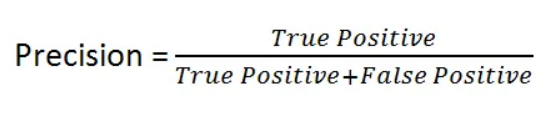

In [1452]:
precision = Precision(task='multiclass', average='macro', num_classes=output_size) * 100

precision_model = precision(y_preds, y_test_tensor)

print(f'Test precision: {precision_model:.2f}%')

Test precision: 79.09%


**Recall**

How many of the actual positives our model capture through labeling it as positive (True Positive)

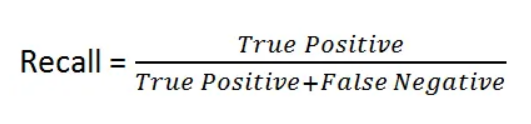

In [1453]:
recall = Recall(task='multiclass', num_classes=output_size) * 100

recall_model = recall(y_preds, y_test_tensor)

print(f'Test recall: {recall_model:.2f}%')

Test recall: 79.45%


**F1 Score**
Gives a balance between Precision and Recall.

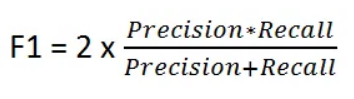

In [1454]:
f1_score = F1Score(task='multiclass', num_classes=output_size) * 100

f1_score_model = f1_score(y_preds, y_test_tensor)

print(f'Test F1 score: {f1_score_model:.2f}%')

Test F1 score: 79.45%


# Validation

In [1455]:
y_pred_probs_val  = model(X_val_tensor)

y_pred_probs_val

tensor([[2.9226e-04, 6.6758e-04, 9.9592e-01, 7.8374e-05, 3.0460e-03, 5.0432e-13],
        [3.6516e-08, 1.3603e-33, 9.9890e-01, 1.1024e-03, 8.6920e-19, 2.5981e-28],
        [3.3275e-09, 6.8247e-05, 2.3676e-08, 6.0775e-03, 9.9231e-01, 1.5453e-03],
        ...,
        [1.9957e-09, 4.0278e-10, 2.0721e-11, 7.1287e-08, 2.4971e-02, 9.7503e-01],
        [2.5007e-09, 1.1993e-09, 3.2499e-11, 1.0149e-07, 3.1982e-02, 9.6802e-01],
        [7.9500e-09, 3.5445e-08, 1.0006e-08, 9.9883e-01, 1.1728e-03, 4.2123e-12]],
       grad_fn=<SoftmaxBackward0>)

## Metrics

In [1456]:
y_preds_val = y_pred_probs_val.argmax(dim=1)

acurracy_model_val = accuracy(y_preds_val, y_val_tensor)

print(f'Validation accuracy: {acurracy_model_val:.2f}%')

Validation accuracy: 79.02%


In [1457]:
precision_val = Precision(task='multiclass', average='macro', num_classes=output_size) * 100

precision_model_val = precision(y_preds_val, y_val_tensor)

print(f'Validation precision: {precision_model_val:.2f}%')

Validation precision: 80.29%


In [1458]:
recall_val = Recall(task='multiclass', num_classes=output_size) * 100

recall_model_val = recall(y_preds_val, y_val_tensor)

print(f'Validation recall: {recall_model_val:.2f}%')

Validation recall: 79.02%


In [1459]:
f1_score_val = F1Score(task='multiclass', num_classes=output_size) * 100

f1_score_model_val = f1_score(y_preds_val, y_val_tensor)

print(f'Validation F1 score: {f1_score_model_val:.2f}%')

Validation F1 score: 79.02%
